<a href="https://colab.research.google.com/github/RababLazar/Stage-technique/blob/master/stage_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
!pip install kmodes
!pip install --upgrade kmodes
from kmodes.kprototypes import KPrototypes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.6/dist-packages (0.10.1)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Reading Dataset
uc3 = pd.read_csv('data.csv',sep=';')
uc3['company_latitude'] = uc3['company_latitude'].str.replace(',','.').astype(float)
uc3['company_longitude'] = uc3['company_longitude'].str.replace(',','.').astype(float)
uc3['company_growth_rate'] = uc3['company_growth_rate'].str.replace(',','.').astype(float)

In [0]:
help(KPrototypes)

Help on class KPrototypes in module kmodes.kprototypes:

class KPrototypes(kmodes.kmodes.KModes)
 |  k-protoypes clustering algorithm for mixed numerical/categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  num_dissim : func, default: euclidian_dissim
 |      Dissimilarity function used by the algorithm for numerical variables.
 |      Defaults to the Euclidian dissimilarity function.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by the kmodes algorithm for categorical variables.
 |      Defaults to the matching dissimilarity function.
 |  
 |  n_init : int, default: 10
 |      Number of time the k-modes algorithm will be run with different
 |      centroid seeds. The final 

In [0]:
len(uc3['company_activity_area'].value_counts())

12

In [0]:
uc3

,company_id,company_name,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country
0,1,Maggio LLC,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan
1,2,"Lubowitz, Brakus and Runte",Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia
2,3,Reinger-Harris,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine
3,4,"Ullrich, Dicki and Witting",Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China
4,5,Sipes LLC,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador
5,6,Ritchie Group,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania
6,7,Stroman LLC,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil
7,8,Heller-Ullrich,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic
8,9,Adams-Considine,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru
9,10,"Larkin, Hills and Rosenbaum",Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal


In [0]:
np.unique(uc3['company_activity_area'])

array(['Accounting', 'Business Development', 'Engineering',
       'Human Resources', 'Legal', 'Marketing', 'Product Management',
       'Research and Development', 'Sales', 'Services', 'Support',
       'Training'], dtype=object)

In [0]:
uc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28239 entries, 0 to 28238
Data columns (total 15 columns):
company_id                      28239 non-null int64
company_name                    28239 non-null object
company_activity_area           28239 non-null object
Company_key_words               28239 non-null object
company_type                    28239 non-null object
company_is_multinational        28239 non-null int64
company_competitive_position    28239 non-null object
company_growth_rate             28239 non-null float64
company_turnover                28239 non-null int64
company_size                    28239 non-null int64
company_nbr_partners            28239 non-null int64
company_nbr_clients             28239 non-null int64
company_latitude                28239 non-null float64
company_longitude               28239 non-null float64
company_country                 28239 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 3.2+ MB


In [0]:
data = uc3.drop(['company_id','company_name'], axis=1)

In [0]:
data

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country
0,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan
1,Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia
2,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine
3,Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China
4,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador
5,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania
6,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil
7,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic
8,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru
9,Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28239 entries, 0 to 28238
Data columns (total 13 columns):
company_activity_area           28239 non-null object
Company_key_words               28239 non-null object
company_type                    28239 non-null object
company_is_multinational        28239 non-null int64
company_competitive_position    28239 non-null object
company_growth_rate             28239 non-null float64
company_turnover                28239 non-null int64
company_size                    28239 non-null int64
company_nbr_partners            28239 non-null int64
company_nbr_clients             28239 non-null int64
company_latitude                28239 non-null float64
company_longitude               28239 non-null float64
company_country                 28239 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 2.8+ MB


In [0]:
# Converting the dataset into matrix
data_matrix = data.values

In [0]:
# Martix for analysis
data_matrix

array([['Sales', 'Automotive', 'Public Company', ..., 43.1654615,
        69.9222782, 'Kazakhstan'],
       ['Training', 'Jewelery', 'S.A.', ..., 5.4356367, 100.3091,
        'Indonesia'],
       ['Human Resources', 'Grocery', 'One person Company', ...,
        45.19045, 33.366867, 'Ukraine'],
       ...,
       ['Business Development', 'Electronics', 'Private Company', ...,
        -14.0648657, -42.4858867, 'Brazil'],
       ['Business Development', 'Movies', 'S.A.R.L.', ..., -8.3728,
        113.4791, 'Indonesia'],
       ['Research and Development', 'Games', 'Private Company', ...,
        -24.085215, -57.2000138, 'Paraguay']], dtype=object)

In [0]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)

In [0]:
clusters = kproto.fit_predict(test, categorical=[0,1,2,4,5,10,11,12])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 181, ncost: 386438370687197.25
Run: 1, iteration: 2/100, moves: 141, ncost: 300272969600088.7
Run: 1, iteration: 3/100, moves: 77, ncost: 265840940659798.75
Run: 1, iteration: 4/100, moves: 60, ncost: 236408870884636.7
Run: 1, iteration: 5/100, moves: 38, ncost: 230261394288504.94
Run: 1, iteration: 6/100, moves: 9, ncost: 229997555862169.47
Run: 1, iteration: 7/100, moves: 6, ncost: 229906213697879.75
Run: 1, iteration: 8/100, moves: 0, ncost: 229906213697879.75
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 354, ncost: 264088916715051.16
Run: 2, iteration: 2/100, moves: 122, ncost: 235386544914011.47
Run: 2, iteration: 3/100, moves: 41, ncost: 230498494668946.7
Run: 2, iteration: 4/100, moves: 14, ncost: 230076478510154.62
Run: 2, iteration: 5/100, moves: 8, ncost: 229908750484236.78
Run: 2, iteration: 6/100

In [0]:
clusters

array([0, 1, 3, ..., 2, 3, 1], dtype=uint16)

In [0]:
test = data.iloc[:1000]
print(test.shape)

(1000, 13)


In [0]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)

In [0]:
clusters = kproto.fit_predict(test, categorical=[0,1,2,4,5,10,11,12])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 208, ncost: 420287576180074.7
Run: 1, iteration: 2/100, moves: 138, ncost: 320319211073066.7
Run: 1, iteration: 3/100, moves: 80, ncost: 281538095802503.2
Run: 1, iteration: 4/100, moves: 58, ncost: 248980187923881.62
Run: 1, iteration: 5/100, moves: 44, ncost: 232928095519374.3
Run: 1, iteration: 6/100, moves: 24, ncost: 230234574902492.8
Run: 1, iteration: 7/100, moves: 8, ncost: 229997555862169.47
Run: 1, iteration: 8/100, moves: 6, ncost: 229906213697879.75
Run: 1, iteration: 9/100, moves: 0, ncost: 229906213697879.75
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 156, ncost: 301385569298360.9
Run: 2, iteration: 2/100, moves: 127, ncost: 256011704725978.6
Run: 2, iteration: 3/100, moves: 57, ncost: 235319674341582.66
Run: 2, iteration: 4/100, moves: 35, ncost: 230261394288504.94
Run: 2, iteration: 5/100, m

In [0]:
clusters

array([2, 0, 3, 3, 0, 3, 1, 0, 0, 0, 1, 3, 2, 3, 3, 3, 1, 0, 1, 3, 0, 3,
       3, 3, 3, 3, 0, 3, 1, 0, 3, 3, 2, 1, 1, 2, 0, 3, 1, 1, 3, 1, 2, 3,
       3, 2, 3, 3, 3, 0, 3, 0, 0, 3, 1, 3, 0, 0, 3, 2, 1, 0, 0, 1, 3, 3,
       3, 3, 1, 1, 0, 3, 0, 0, 3, 0, 3, 2, 3, 3, 0, 3, 0, 1, 1, 0, 3, 3,
       3, 1, 3, 1, 0, 3, 2, 3, 0, 3, 3, 0, 2, 1, 0, 2, 0, 3, 0, 2, 3, 1,
       3, 0, 3, 1, 3, 3, 3, 1, 3, 0, 1, 1, 3, 3, 0, 2, 0, 3, 2, 0, 3, 0,
       2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 1, 3, 2, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 1, 0, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0,
       0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 1, 2, 1, 3, 0, 0, 3, 3, 2, 3, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 1,
       3, 0, 3, 0, 1, 0, 3, 3, 3, 1, 0, 1, 2, 1, 2, 1, 0, 2, 3, 3, 1, 3,
       1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 1, 1, 2, 1, 1, 1,
       3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 1, 3, 2, 1, 3,

In [0]:
# Converting the dataset into matrix
test_matrix = test.values

In [0]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(test_matrix, categorical=[0,1,2,4,5,10,11,12])
    cost.append(kproto.cost_)


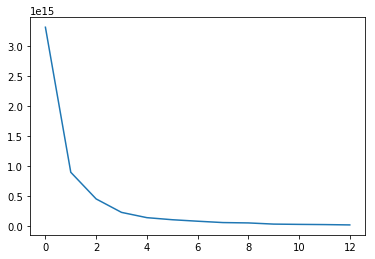

In [0]:
plt.plot(cost)

In [0]:
data_matrix = data.values

In [0]:
data_matrix

array([['Sales', 'Automotive', 'Public Company', ..., '43,1654615',
        '69,9222782', 'Kazakhstan'],
       ['Training', 'Jewelery', 'S.A.', ..., '5,4356367', '100,3091',
        'Indonesia'],
       ['Human Resources', 'Grocery', 'One person Company', ...,
        '45,19045', '33,366867', 'Ukraine'],
       ...,
       ['Business Development', 'Electronics', 'Private Company', ...,
        '-14,0648657', '-42,4858867', 'Brazil'],
       ['Business Development', 'Movies', 'S.A.R.L.', ..., '-8,3728',
        '113,4791', 'Indonesia'],
       ['Research and Development', 'Games', 'Private Company', ...,
        '-24,085215', '-57,2000138', 'Paraguay']], dtype=object)

In [0]:
data

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country
0,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan
1,Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia
2,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine
3,Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China
4,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador
5,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania
6,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil
7,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic
8,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru
9,Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 3315089926490859.0
Init: 

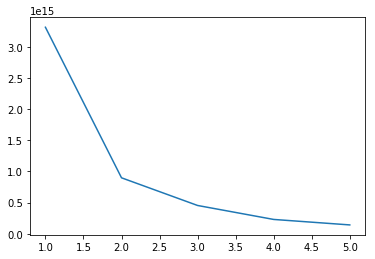

In [0]:
#Choosing optimal K
cost = []
datam = data.iloc[:1000]
for num_clusters in list(range(1,6)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao',verbose=2)
    kproto.fit_predict(datam, categorical=[0,1,2,4,12])
    cost.append(kproto.cost_)
    
plt.plot(range(1,6) ,cost)

In [0]:
data

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country
0,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan
1,Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia
2,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine
3,Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China
4,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador
5,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania
6,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil
7,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic
8,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru
9,Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal


In [0]:
# Running 4-Prototype clustering
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)

In [0]:
clusters = kproto.fit_predict(data, categorical=[0,1,2,4,12])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4502, ncost: 9295229368044780.0
Run: 1, iteration: 2/100, moves: 2037, ncost: 8337030380372878.0
Run: 1, iteration: 3/100, moves: 1483, ncost: 7617930072279912.0
Run: 1, iteration: 4/100, moves: 1582, ncost: 6837883427773739.0
Run: 1, iteration: 5/100, moves: 874, ncost: 6699550228526030.0
Run: 1, iteration: 6/100, moves: 496, ncost: 6664859119143857.0
Run: 1, iteration: 7/100, moves: 272, ncost: 6654658309120880.0
Run: 1, iteration: 8/100, moves: 159, ncost: 6651016531279218.0
Run: 1, iteration: 9/100, moves: 78, ncost: 6650108246905822.0
Run: 1, iteration: 10/100, moves: 41, ncost: 6649824599202304.0
Run: 1, iteration: 11/100, moves: 19, ncost: 6649779308750176.0
Run: 1, iteration: 12/100, moves: 6, ncost: 6649772866428323.0
Run: 1, iteration: 13/100, moves: 2, ncost: 6649767687461498.0
Run: 1, iteration: 14/100, mov

In [0]:
clusters

array([1, 3, 0, ..., 2, 0, 3], dtype=uint16)

In [0]:
# Print cluster centroids of the trained model.
kproto.cluster_centroids_

[array([[1.41893428e-01, 2.42701683e+01, 6.02795746e+05, 1.13627378e+02,
         5.00985371e+00, 6.91919958e+00, 2.49348541e+01, 4.46108820e+01],
        [5.08223684e-01, 2.47781305e+01, 6.72963382e+06, 5.00404057e+02,
         8.88157895e+00, 1.77494518e+01, 2.52940311e+01, 4.42377682e+01],
        [4.93745885e-01, 2.43515059e+01, 4.09023768e+06, 3.57593647e+02,
         8.13693219e+00, 1.36635945e+01, 2.46478356e+01, 4.43836065e+01],
        [3.64119787e-01, 2.40833151e+01, 2.06775410e+06, 2.51542121e+02,
         6.16484747e+00, 1.04000840e+01, 2.50080842e+01, 4.41715676e+01]]),
 array([['Research and Development', 'Computers', 'S.A.R.L.',
         'Specialist', 'China'],
        ['Marketing', 'Music', 'Public Company', 'Leader', 'China'],
        ['Product Management', 'Grocery', 'S.A.', 'Challenger', 'China'],
        ['Accounting', 'Automotive', 'Private Company', 'Challenger',
         'China']], dtype='<U24')]

In [0]:
# Checking the cost of the clusters created.
# cost_ : float
#     Clustering cost, defined as the sum distance of all points to
#     their respective cluster centroids.
kproto.cost_

6649766446241835.0

In [0]:
# The number of iterations the algorithm ran for
kproto.n_iter_

15

In [0]:
datac = data.copy()

In [0]:
# Adding the predicted clusters to the main dataset
datac['cluster_id'] = clusters

In [0]:
datac

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country,cluster_id
0,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan,1
1,Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia,3
2,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine,0
3,Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China,0
4,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador,3
5,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania,0
6,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil,2
7,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic,3
8,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru,3
9,Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal,3


In [0]:
# Re-check
datac[:10]

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country,cluster_id
0,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan,1
1,Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia,3
2,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine,0
3,Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China,0
4,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador,3
5,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania,0
6,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil,2
7,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic,3
8,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru,3
9,Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal,3


In [0]:
cluster0=datac.loc[datac['cluster_id']==0]

In [0]:
cluster0

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country,cluster_id
2,Human Resources,Grocery,One person Company,0,Challenger,38.23,1237355,4,1,4,45.190450,33.366867,Ukraine,0
3,Business Development,Industrial,S.A.,0,Outsider,10.92,472048,732,2,14,28.007425,104.009031,China,0
5,Research and Development,Books,S.A.R.L.,0,Leader,9.71,676891,4,5,8,41.021678,19.822316,Albania,0
11,Support,Baby,S.A.R.L.,0,Challenger,13.20,769404,40,7,8,60.681579,17.135099,Sweden,0
13,Services,Games,S.A.R.L.,0,Leader,34.11,123698,16,7,9,35.257198,136.242372,Japan,0
14,Services,Computers,S.A.,0,Outsider,28.69,76327,699,12,6,50.309546,17.522398,Poland,0
15,Sales,Sports,Private Company,0,Leader,12.50,1112859,25,1,12,49.823894,34.526096,Ukraine,0
19,Research and Development,Health,One person Company,0,Challenger,3.66,718058,4,2,0,41.805137,123.469948,China,0
21,Research and Development,Music,One person Company,0,Specialist,13.22,95773,1,0,1,52.336644,20.941429,Poland,0
22,Business Development,Outdoors,One person Company,0,Follower,31.87,309052,5,0,0,51.932811,21.303281,Poland,0


In [0]:
cluster1=datac.loc[datac['cluster_id']==1]

In [0]:
cluster1

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country,cluster_id
0,Sales,Automotive,Public Company,0,Follower,35.63,5916452,145,7,8,43.165461,69.922278,Kazakhstan,1
32,Accounting,Sports,Public Company,0,Specialist,26.22,5503031,184,5,8,31.543848,130.538736,Japan,1
35,Services,Automotive,Public Company,0,Challenger,23.40,7955456,613,5,23,-8.635497,115.157361,Indonesia,1
59,Training,Automotive,Public Company,1,Leader,43.50,7616466,529,5,25,14.105202,-15.541576,Senegal,1
77,Services,Garden,Public Company,0,Outsider,43.04,6178139,413,3,21,38.024900,22.732940,Greece,1
94,Legal,Games,Public Company,0,Leader,31.73,7585111,655,2,30,-7.615588,110.716717,Indonesia,1
100,Sales,Beauty,Public Company,1,Challenger,23.12,7815797,350,4,6,-6.981282,112.879070,Indonesia,1
103,Marketing,Sports,Public Company,1,Follower,28.84,6436221,281,4,15,29.714699,118.337521,China,1
107,Services,Automotive,Public Company,1,Leader,38.67,5907850,338,11,30,16.032631,-16.481817,Senegal,1
125,Accounting,Games,Public Company,0,Leader,40.64,6227405,706,10,20,-24.776270,25.414119,Botswana,1


In [0]:
cluster2=datac.loc[datac['cluster_id']==2]

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cluster3=datac.loc[datac['cluster_id']==3]

In [0]:
cluster2

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country,cluster_id
6,Human Resources,Games,Public Company,1,Leader,5.86,3658588,753,16,21,-20.499347,-43.861357,Brazil,2
10,Research and Development,Baby,Public Company,1,Specialist,45.06,3410522,878,6,10,42.611806,-71.332948,China,2
12,Accounting,Movies,Public Company,0,Challenger,9.23,5237205,756,7,6,48.987560,2.297158,France,2
16,Product Management,Shoes,Private Company,1,Specialist,37.66,3395995,145,3,10,40.704986,19.649052,Albania,2
18,Legal,Tools,S.A.,1,Specialist,3.03,3167586,204,16,17,45.300292,4.253175,France,2
33,Legal,Baby,Private Company,1,Follower,34.01,3988640,95,8,1,-7.263013,112.721171,Indonesia,2
38,Legal,Jewelery,S.A.,0,Follower,42.99,4922384,947,14,22,1.460443,125.185992,Indonesia,2
39,Services,Sports,Public Company,1,Leader,7.15,3118741,881,8,20,31.268047,121.004054,China,2
41,Support,Computers,Private Company,0,Outsider,33.34,4393118,85,5,6,41.305838,124.120286,China,2
42,Business Development,Computers,Public Company,1,Specialist,15.04,5304094,746,16,6,11.394604,-69.681034,Venezuela,2


In [0]:
cluster3

,company_activity_area,Company_key_words,company_type,company_is_multinational,company_competitive_position,company_growth_rate,company_turnover,company_size,company_nbr_partners,company_nbr_clients,company_latitude,company_longitude,company_country,cluster_id
1,Training,Jewelery,S.A.,0,Leader,43.97,2564848,769,14,5,5.435637,100.309100,Indonesia,3
4,Support,Sports,Private Company,1,Follower,17.90,2743582,177,3,1,-1.553873,-79.762418,Ecuador,3
7,Business Development,Clothing,Private Company,0,Leader,15.14,2311600,25,3,3,48.872950,16.766466,Czech Republic,3
8,Research and Development,Games,Private Company,0,Leader,20.52,2593380,59,4,14,-14.087459,-75.762586,Peru,3
9,Support,Industrial,S.A.,1,Outsider,42.76,2226032,7,7,4,40.755369,-8.645513,Portugal,3
17,Accounting,Computers,Public Company,1,Leader,28.83,2001318,107,8,11,41.119938,-7.505490,Portugal,3
20,Services,Movies,S.A.,0,Challenger,22.77,2108363,505,10,15,7.755323,124.247448,Philippines,3
26,Marketing,Garden,S.A.,0,Outsider,4.09,2870122,429,6,7,54.989789,62.547128,Russia,3
28,Services,Health,S.A.,0,Leader,40.70,3001261,112,5,4,1.600501,-75.037750,Colombia,3
29,Research and Development,Computers,Private Company,0,Challenger,27.31,2342783,11,2,10,28.663694,118.534841,China,3


In [0]:
data1 = pd.DataFrame(data['company_activity_area'].value_counts())

In [0]:
data1

,company_activity_area
Sales,2423
Product Management,2408
Services,2396
Accounting,2385
Business Development,2368
Marketing,2355
Research and Development,2354
Support,2330
Legal,2328
Human Resources,2320


In [0]:
np.unique(data['company_activity_area'])

array(['Accounting', 'Business Development', 'Engineering',
       'Human Resources', 'Legal', 'Marketing', 'Product Management',
       'Research and Development', 'Sales', 'Services', 'Support',
       'Training'], dtype=object)

In [0]:
np.unique(data['Company_key_words'])

array(['Automotive', 'Baby', 'Beauty', 'Books', 'Clothing', 'Computers',
       'Electronics', 'Games', 'Garden', 'Grocery', 'Health', 'Home',
       'Industrial', 'Jewelery', 'Kids', 'Movies', 'Music', 'Outdoors',
       'Shoes', 'Sports', 'Tools', 'Toys'], dtype=object)

In [0]:
np.unique(data['company_type'])

array(['One person Company', 'Private Company', 'Public Company', 'S.A.',
       'S.A.R.L.'], dtype=object)

In [0]:
np.unique(data['company_competitive_position'])

array(['Challenger', 'Follower', 'Leader', 'Outsider', 'Specialist'],
      dtype=object)

In [0]:
# Checking the clusters created
dataclustrée = pd.DataFrame(datac['cluster_id'].value_counts())

In [0]:
dataclustrée

,cluster_id
0,13193
3,7146
2,6076
1,1824


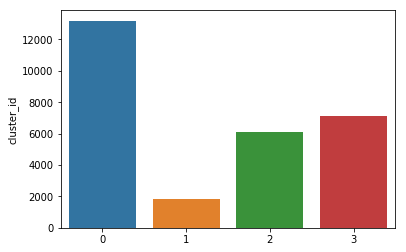

In [0]:
sns.barplot(x=dataclustrée.index, y=dataclustrée['cluster_id'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4324, ncost: 1.3514225524491656e+16
Run: 1, iteration: 2/100, moves: 4232, ncost: 1.1787670166481068e+16
Run: 1, iteration: 3/100, moves: 4060, ncost: 1.015344236203358e+16
Run: 1, iteration: 4/100, moves: 3454, ncost: 8967038583956084.0
Run: 1, iteration: 5/100, moves: 2593, ncost: 8158555024857341.0
Run: 1, iteration: 6/100, moves: 1828, ncost: 7401110552037340.0
Run: 1, iteration: 7/100, moves: 1555, ncost: 6776622957825189.0
Run: 1, iteration: 8/100, moves: 777, ncost: 6688358734562374.0
Run: 1, iteration: 9/100, moves: 438, ncost: 6662050183491536.0
Run: 1, iteration: 10/100, moves: 260, ncost: 6653104951315745.0
Run: 1, iteration: 11/100, moves: 129, ncost: 6650675938936640.0
Run: 1, iteration: 12/100, moves: 75, ncost: 6649919747621918.0
Run: 1, iteration: 13/100, moves: 31, ncost: 6649794353667911.0
Run: 1, iteration: 14/100, moves: 13, ncost: 6649773617041232.0
Run:

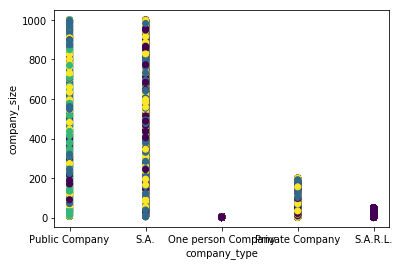

In [0]:
xs = data["company_type"]
ys = data["company_size"]
plt.xlabel('company_type')
plt.ylabel('company_size')
plt.scatter(xs, ys, c= kproto.fit_predict(data, categorical=[0,1,2,4,12]))